# Structured and time series data

My attempt at following along with lesson3-rossman.ipynb

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Import datasets

In [2]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/rossmann/'

Downloaded the dataset from [fast.ai](http://files.fast.ai/part2/lesson14/rossmann.tgz):

In [3]:
!ls {PATH}

googletrend.csv  README.org		store.csv	  train.csv
joined		 sample_submission.csv	store_states.csv  weather.csv
joined_test	 state_names.csv	test.csv


I skipped the part about creating data: I don't have the original data to try it on my own.

In [4]:
table_names = ['train', 'store', 'store_states', 'state_names', 
               'googletrend', 'weather', 'test']

Read in to pandas frames:

In [7]:
tables = [pd.read_csv(os.path.join(PATH, f"{fname}.csv"), low_memory=False) for fname in table_names]

In [8]:
from IPython.display import HTML

In [9]:
for t in tables: display(t.head())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [10]:
for t in tables: display(DataFrameSummary(t).summary())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.01721e+06,1.01721e+06,NaN,1.01721e+06,1.01721e+06,1.01721e+06,1.01721e+06,NaN,1.01721e+06
mean,558.43,3.99834,NaN,5773.82,633.146,0.830107,0.381515,NaN,0.178647
std,321.909,1.99739,NaN,3849.93,464.412,0.375539,0.485759,NaN,0.383056
min,1,1,NaN,0,0,0,0,NaN,0
25%,280,2,NaN,3727,405,1,0,NaN,0
50%,558,4,NaN,5744,609,1,0,NaN,0
75%,838,6,NaN,7856,837,1,1,NaN,0
max,1115,7,NaN,41551,7388,1,1,NaN,1
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,4,2


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115,NaN,NaN,1112,761,761,1115,571,571,NaN
mean,558,NaN,NaN,5404.9,7.2247,2008.67,0.512108,23.5954,2011.76,NaN
std,322.017,NaN,NaN,7663.17,3.21235,6.19598,0.500078,14.142,1.67494,NaN
min,1,NaN,NaN,20,1,1900,0,1,2009,NaN
25%,279.5,NaN,NaN,717.5,4,2006,0,13,2011,NaN
50%,558,NaN,NaN,2325,8,2010,1,22,2012,NaN
75%,836.5,NaN,NaN,6882.5,10,2013,1,37,2013,NaN
max,1115,NaN,NaN,75860,12,2015,1,50,2015,NaN
counts,1115,1115,1115,1112,761,761,1115,571,571,571
uniques,1115,4,3,654,12,23,2,24,7,3


,Store,State
count,1115,NaN
mean,558,NaN
std,322.017,NaN
min,1,NaN
25%,279.5,NaN
50%,558,NaN
75%,836.5,NaN
max,1115,NaN
counts,1115,1115
uniques,1115,12


,StateName,State
count,16,16
unique,16,16
top,Bremen,SL
freq,1,1
counts,16,16
uniques,16,16
missing,0,0
missing_perc,0%,0%
types,unique,unique


,file,week,trend
count,NaN,NaN,2072
mean,NaN,NaN,63.8142
std,NaN,NaN,12.6502
min,NaN,NaN,0
25%,NaN,NaN,55
50%,NaN,NaN,64
75%,NaN,NaN,72
max,NaN,NaN,100
counts,2072,2072,2072
uniques,14,148,68


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
count,NaN,NaN,15840,15840,15840,15840,15840,15840,15840,15840,...,15459,15459,15459,15840,15840,3604,15840,14667,NaN,15840
mean,NaN,NaN,14.6441,10.389,6.19899,8.58782,6.20581,3.62614,93.6596,74.2829,...,24.0576,12.2398,7.02516,22.7666,11.9722,48.8643,0.831718,5.55131,NaN,175.897
std,NaN,NaN,8.64601,7.37926,6.52639,6.24478,6.08677,6.12839,7.67853,13.4866,...,8.9768,5.06794,4.9806,8.98862,5.87284,13.027,2.51351,1.68771,NaN,101.589
min,NaN,NaN,-11,-13,-15,-14,-15,-73,44,30,...,0,0,0,3,2,21,0,0,NaN,-1
25%,NaN,NaN,8,4,1,4,2,-1,90.75,65,...,14,10,3,16,8,39,0,5,NaN,80
50%,NaN,NaN,15,11,7,9,7,4,94,76,...,31,11,7,21,11,48,0,6,NaN,202
75%,NaN,NaN,21,16,11,13,11,8,100,85,...,31,14,10,27,14,55,0.25,7,NaN,256
max,NaN,NaN,39,31,24,25,20,19,100,100,...,31,31,31,101,53,111,58.93,8,NaN,360
counts,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,...,15459,15459,15459,15840,15840,3604,15840,14667,11889,15840
uniques,16,990,51,45,40,40,36,40,53,71,...,24,32,24,44,29,47,41,9,21,362


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
count,41088,41088,41088,NaN,41077,41088,NaN,41088
mean,20544.5,555.9,3.97917,NaN,0.854322,0.395833,NaN,0.443487
std,11861.2,320.274,2.01548,NaN,0.352787,0.489035,NaN,0.496802
min,1,1,1,NaN,0,0,NaN,0
25%,10272.8,279.75,2,NaN,1,0,NaN,0
50%,20544.5,553.5,4,NaN,1,0,NaN,0
75%,30816.2,832.25,6,NaN,1,1,NaN,1
max,41088,1115,7,NaN,1,1,NaN,1
counts,41088,41088,41088,41088,41077,41088,41088,41088
uniques,41088,856,7,48,2,2,2,2


## Data Cleaning / Feature Engineering

In [11]:
train, store, store_states, state_names, googletrend, weather, test = tables

In [12]:
len(train), len(test)

(1017209, 41088)

Convert certain fields to `bool`s

In [14]:
train.StateHoliday = train.StateHoliday != '0'
test.StateHoliday = test.StateHoliday != '0'

In [18]:
type(test.Open[0])

numpy.float64

`join_df` is a function for joining tables on specific fields. By default, we'll be doing a [left outer join](https://en.wikipedia.org/wiki/Join_%28SQL%29#Left_outer_join) (i.e. inner join + keep rows of left table that don't match anything in the right table) of right on the left argument using the given fields for each table.

Pandas does joins using the merge method. The suffixes argument describes the naming convention for duplicate fields. We've elected to leave the duplicate field names on the left untouched, and append a `"_y"` to those on the right.


In [17]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    """@param left: Dataframe
    @param right: Dataframe
    @param left_on: column name in left table
    @param right_on: (default: left_on) column name in right table
    @param suffix: (default: "_y") appended to duplicate column names from the right table"""
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

Join `weather` and `state_names` tables to add the state 2-letter abbreviation column to `weather`

In [20]:
weather = join_df(weather, state_names, "file", "StateName")

`googletrend` contains a `week` column formatted as `<Sunday> - <Saturday>`.  Extract the Sunday as new `Date` column.  There is also a `file` column encoding the state's 2 letter abbreviation to extract as `State` column.  There is also some normalization of state identifier from `NI` to `HB,NI`, to match the convention used in `state_names` and `store_states` (`.loc[rows, cols]` is a Pandas Dataframe method to select a region of the Dataframe).

In [22]:
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]
googletrend.loc[googletrend.State == 'NI', 'State'] = "HB,NI"

Use fast.ai methods to add date-related features (e.g. "is month start"):

In [23]:
add_datepart(weather, "Date", drop=False)
add_datepart(googletrend, "Date", drop=False)
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)

Pull out google trends data covering the whole of Germany instead of state level:

In [24]:
trend_de = googletrend[googletrend.file == 'Rossmann_DE']

Now we can outer join all of our data into a single dataframe. Recall that in outer joins everytime a value in the joining field on the left table does not have a corresponding value on the right table, the corresponding row in the new table has Null values for all right table fields. One way to check that all records are consistent and complete is to check for Null values post-join, as we do here.

Aside: Why not just do an inner join? If you are assuming that all records are complete and match on the field you desire, an inner join will do the same thing as an outer join. However, in the event you are wrong or a mistake is made, an outer join followed by a null-check will catch it. (Comparing before/after # of rows for inner join is equivalent, but requires keeping track of before/after row #'s. Outer join is easier.)


In [26]:
store = join_df(store, store_states, "Store")
len(store[store.State.isnull()])

0

In [27]:
joined = join_df(train, store, "Store")
joined_test = join_df(test, store, "Store")
len(joined[joined.StoreType.isnull()]), len(joined_test[joined_test.StoreType.isnull()])

(0, 0)

In [28]:
joined = join_df(joined, googletrend, ["State", "Year", "Week"])
joined_test = join_df(joined_test, googletrend, ["State", "Year", "Week"])
len(joined[joined.trend.isnull()]), len(joined_test[joined_test.trend.isnull()])

(0, 0)

In [29]:
joined = joined.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
joined_test = joined_test.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
len(joined[joined.trend_DE.isnull()]),len(joined_test[joined_test.trend_DE.isnull()])

(0, 0)

In [30]:
joined = join_df(joined, weather, ["State", "Date"])
joined_test = join_df(joined_test, weather, ["State", "Date"])
len(joined[joined.Mean_TemperatureC.isnull()]), len(joined_test[joined_test.Mean_TemperatureC.isnull()])

(0, 0)

Drop duplicate columns introduced by `join_df`.
I have no idea why they check that the column exists even though they are looping over it.

In [31]:
for df in (joined, joined_test):
    for c in df.columns:
        if c.endswith('_y'):
            if c in df.columns: df.drop(c, inplace=True, axis=1)

Fill in missing values (arbitrary signal value that doesn't appear anywhere in the data).  I don't know why they ignore some columns.

In [38]:
[c for c in joined_test.columns if (sum(joined_test[c].isnull())) > 0]

['Open',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'State_DE',
 'Max_VisibilityKm',
 'Mean_VisibilityKm',
 'Min_VisibilitykM',
 'Max_Gust_SpeedKm_h',
 'CloudCover',
 'Events']

In [41]:
[c for c in joined.columns if (sum(joined[c].isnull())) > 0]

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'State_DE',
 'Max_VisibilityKm',
 'Mean_VisibilityKm',
 'Min_VisibilitykM',
 'Max_Gust_SpeedKm_h',
 'CloudCover',
 'Events']

In [42]:
for df in (joined,joined_test):
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)

Extract features to compute the duration how long a competitor has been open (filling a fake day of the month because we only know the year and month):

In [43]:
for df in (joined,joined_test):
    df["CompetitionOpenSince"] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear, 
                                                     month=df.CompetitionOpenSinceMonth, day=15))
    df["CompetitionDaysOpen"] = df.Date.subtract(df.CompetitionOpenSince).dt.days

Replace erroneous / outlying data (Note to self: I should investigate myself if no other data needs cleaning):

In [44]:
for df in (joined,joined_test):
    df.loc[df.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
    df.loc[df.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

We add "CompetitionMonthsOpen" field, limiting the maximum to 2 years to limit number of unique categories.

In [45]:
for df in (joined,joined_test):
    df["CompetitionMonthsOpen"] = df["CompetitionDaysOpen"]//30
    df.loc[df.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
joined.CompetitionMonthsOpen.unique()

array([24,  3, 19,  9,  0, 16, 17,  7, 15, 22, 11, 13,  2, 23, 12,  4, 10,  1, 14, 20,  8, 18,  6, 21,  5])

Same process for promotions:

In [46]:
for df in (joined,joined_test):
    df["Promo2Since"] = pd.to_datetime(df.apply(lambda x: Week(
        x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1).astype(pd.datetime))
    df["Promo2Days"] = df.Date.subtract(df["Promo2Since"]).dt.days
    df.loc[df.Promo2Days<0, "Promo2Days"] = 0
    df.loc[df.Promo2SinceYear<1990, "Promo2Days"] = 0
    df["Promo2Weeks"] = df["Promo2Days"]//7
    df.loc[df.Promo2Weeks<0, "Promo2Weeks"] = 0
    df.loc[df.Promo2Weeks>25, "Promo2Weeks"] = 25
    df.Promo2Weeks.unique()

Save data as [feather](https://blog.rstudio.com/2016/03/29/feather/) files

In [47]:
joined.to_feather(os.path.join(PATH, 'joined'))
joined_test.to_feather(os.path.join(PATH, 'joined_test'))

Read back the data:

In [5]:
joined = pd.read_feather(os.path.join(PATH, 'joined'))
joined_test = pd.read_feather(os.path.join(PATH, 'joined_test'))

## Durations

Copy their function to do cumulative counting across rows of a sorted dataframe, but modify not to use global variables.

In [6]:
def get_elapsed(df, fld, pre):
    """Add column do dataframe with cumulative elapsed time in days
    @param df: Dataframe, sorted chronolgically
    @param fld: Column name, when the value in a row is True, the cumulative counter restarts at 0
    @param pre: prefix for the output column name (i.e. pre+fld)"""
    day1 = np.timedelta64(1, 'D')
    last_date = np.datetime64()
    last_store = 0
    res = []
    for s,v,d in zip(df.Store.values, df[fld].values, df.Date.values):
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v: last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1))
    df[pre+fld] = res

In [10]:
def add_durations(df):
    columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]
    df = df[columns]
    # Add columns with cumulative time since last schoolholiday
    fld = 'SchoolHoliday'
    df = df.sort_values(['Store', 'Date'])
    get_elapsed(df, fld, 'After')
    # ... same but before next schoolholiday
    df = df.sort_values(['Store', 'Date'], ascending=[True, False])
    get_elapsed(df, fld, 'Before')
    # Now for time since/before stateholiday
    fld = 'StateHoliday'
    df = df.sort_values(['Store', 'Date'])
    get_elapsed(df, fld, 'After')
    df = df.sort_values(['Store', 'Date'], ascending=[True, False])
    get_elapsed(df, fld, 'Before')
    # Now for Promotions
    fld = 'Promo'
    df = df.sort_values(['Store', 'Date'])
    get_elapsed(df, fld, 'After')
    df = df.sort_values(['Store', 'Date'], ascending=[True, False])
    get_elapsed(df, fld, 'Before')

    # We're going to set the active index to Date.
    df = df.set_index("Date")

    # Then set null values from elapsed field calculations to 0.
    columns = ['SchoolHoliday', 'StateHoliday', 'Promo']
    for pre in ['Before', 'After']:
        for fld in columns:
            a = pre + fld
            df[a] = df[a].fillna(0).astype(int)

    # Next we'll demonstrate window functions in pandas to calculate rolling quantities.
    # Here we're sorting by date (sort_index()) and counting the number of events of interest
    # (sum()) defined in columns in the following week (rolling()), grouped by
    # Store (groupby()). We do the same in the opposite direction.
    bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()
    fwd = df[['Store']+columns].sort_index(ascending=False
                                          ).groupby("Store").rolling(7, min_periods=1).sum()

    # Next we want to drop the Store indices grouped together in the window function.
    # Often in pandas, there is an option to do this in place. This is time and memory
    # efficient when working with large datasets.
    bwd.drop('Store',1,inplace=True)
    bwd.reset_index(inplace=True)
    fwd.drop('Store',1,inplace=True)
    fwd.reset_index(inplace=True)
    df.reset_index(inplace=True)

    # Now we'll merge these values onto the df.
    df = df.merge(bwd, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
    df = df.merge(fwd, 'left', ['Date', 'Store'], suffixes=['', '_fw'])
    df.drop(columns,1,inplace=True)
    return df

In [11]:
df = add_durations(joined)

In [12]:
df.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-07-31,1,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2015-07-30,1,0,0,56,0,0,0,4.0,0.0,4.0,2.0,0.0,2.0
2,2015-07-29,1,0,0,55,0,0,0,3.0,0.0,3.0,3.0,0.0,3.0
3,2015-07-28,1,0,0,54,0,0,0,2.0,0.0,2.0,4.0,0.0,4.0
4,2015-07-27,1,0,0,53,0,0,0,1.0,0.0,1.0,5.0,0.0,5.0


In [13]:
df.to_feather(os.path.join(PATH, "df"))

In [15]:
df["Date"] = pd.to_datetime(df.Date)
sum(sum(joined[c].isnull()) for c in joined.columns)

2705426

In [18]:
joined = join_df(joined, df, ['Store', 'Date'])
sum(sum(joined[c].isnull()) for c in joined.columns)

2705426

The same for the test data:

In [19]:
df = add_durations(joined_test)
df.to_feather(os.path.join(PATH, "df_test"))
df.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-09-17,1,13,0,0,0,0,0,0.0,0.0,4.0,0.0,0.0,1.0
1,2015-09-16,1,12,0,0,0,0,0,0.0,0.0,3.0,0.0,0.0,2.0
2,2015-09-15,1,11,0,0,0,0,0,0.0,0.0,2.0,0.0,0.0,3.0
3,2015-09-14,1,10,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
4,2015-09-13,1,9,0,0,0,9,-1,0.0,0.0,0.0,0.0,0.0,4.0


In [21]:
df["Date"] = pd.to_datetime(df.Date)
sum(sum(joined_test[c].isnull()) for c in joined_test.columns)

112085

In [22]:
joined_test = join_df(joined_test, df, ['Store', 'Date'])
sum(sum(joined_test[c].isnull()) for c in joined_test.columns)

112085

Even though the course seems to discourage it, we do it, just like they did...

The authors also removed all instances where the store had zero sale / was closed. We speculate that this may have cost them a higher standing in the competition. One reason this may be the case is that a little exploratory data analysis reveals that there are often periods where stores are closed, typically for refurbishment. Before and after these periods, there are naturally spikes in sales that one might expect. By ommitting this data from their training, the authors gave up the ability to leverage information about these periods to predict this otherwise volatile behavior.

In [23]:
joined = joined[joined.Sales!=0]

Back up the data:

In [24]:
joined.reset_index(inplace=True)
joined_test.reset_index(inplace=True)

In [25]:
joined.to_feather(os.path.join(PATH, 'joined_cumul'))
joined_test.to_feather(os.path.join(PATH, 'joined_test_cumul'))

## Create features

In [65]:
joined = pd.read_feather(f'{PATH}joined_cumul')
joined_test = pd.read_feather(f'{PATH}joined_test_cumul')
joined.head().T.head(40)

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


Now that we've engineered all our features, we need to convert to input compatible with a neural network.

This includes converting categorical variables into contiguous integers or one-hot encodings, normalizing continuous features to standard normal, etc...

In [66]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

contin_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

n = len(joined); n

844338

In [67]:
dep = 'Sales' # The dependent variable we want to predict
joined = joined[cat_vars+contin_vars+[dep, 'Date']].copy()

In [68]:
joined_test[dep] = 0
joined_test = joined_test[cat_vars+contin_vars+[dep, 'Date', 'Id']].copy()

In [69]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

Apply categories from `joined` to `joined_test`, using the fast.ai function `apply_cats`:

In [70]:
apply_cats(joined_test, joined)

In [71]:
for v in contin_vars:
    joined[v] = joined[v].astype('float32')
    joined_test[v] = joined_test[v].astype('float32')

In [38]:
idxs = get_cv_idxs(n, val_pct=150000/n)
joined_samp = joined.iloc[idxs].set_index("Date") # iloc (Pandas): integer-location based indexing, selecting by position
samp_size = len(joined_samp); samp_size

150000

To run on the full dataset, use this instead: `samp_size = n; joined_samp = joined.set_index("Date")`

In [39]:
joined_samp.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-16,257,2,2015,6,16,False,24,0,a,a,...,18.0,8.0,6.0,63.0,71.0,22.0,0.0,1.0,0.0,5934
2013-10-30,4,3,2013,10,30,False,24,0,c,c,...,29.0,16.0,2.0,74.0,66.0,27.0,-56.0,0.0,0.0,7800


In [40]:
df, y, nas, mapper = proc_df(joined_samp, dep, do_scale=True)
yl = np.log(y)

In [41]:
joined_test = joined_test.set_index("Date")

Apply similar (same scaling and N/A handling) to test data:

In [42]:
df_test, _, nas, mapper = proc_df(joined_test, dep, do_scale=True, skip_flds=['Id'],
                                  mapper=mapper, na_dict=nas)

In [44]:
df.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,CompetitionDistance_na,CloudCover_na
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-16,257,2,3,6,16,1,25,1,1,1,...,-0.651394,0.266629,-0.194358,0.487305,-0.525077,1.109608,1.115768,-0.489079,-0.050661,-0.294389
2013-10-30,4,3,1,10,30,1,25,1,3,3,...,0.700532,-2.197401,0.769911,-0.026011,-0.363976,-0.602128,-0.896244,-0.489079,-0.050661,-0.294389


## Validation data

In time series data, cross-validation is not random. Instead, our holdout data is generally the most recent data, as it would be in real application. This issue is discussed in detail in [this post](http://www.fast.ai/2017/11/13/validation-sets/) on our web site.

One approach is to take the last 25% of rows (sorted by date) as our validation set, but an even better option for picking a validation set is using the exact same length of time period as the test set uses - this is implemented here (test data goes from 2015-08-01 to 2015-09-17, so we pick the most recent similar date range from our training set):

In [45]:
val_idx = np.flatnonzero(
    (df.index<=datetime.datetime(2014,9,17)) & (df.index>=datetime.datetime(2014,8,1)))

In [46]:
len(val_idx)

6763

## Deep Learning

Define the metric that Kaggle used for the competition.

In [47]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

Load data into a `ColumnarModelData` object:

In [48]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test)

Look at distribution of category sizes:

In [49]:
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars]; cat_sz

[('Store', 1116),
 ('DayOfWeek', 8),
 ('Year', 4),
 ('Month', 13),
 ('Day', 32),
 ('StateHoliday', 3),
 ('CompetitionMonthsOpen', 26),
 ('Promo2Weeks', 27),
 ('StoreType', 5),
 ('Assortment', 4),
 ('PromoInterval', 4),
 ('CompetitionOpenSinceYear', 24),
 ('Promo2SinceYear', 9),
 ('State', 13),
 ('Week', 53),
 ('Events', 22),
 ('Promo_fw', 7),
 ('Promo_bw', 7),
 ('StateHoliday_fw', 4),
 ('StateHoliday_bw', 4),
 ('SchoolHoliday_fw', 9),
 ('SchoolHoliday_bw', 9)]

We use the cardinality of each variable (that is, its number of unique values) to decide how large to make its _embeddings_. Each level will be associated with a vector with length defined as below.

In [50]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]; emb_szs

[(1116, 50),
 (8, 4),
 (4, 2),
 (13, 7),
 (32, 16),
 (3, 2),
 (26, 13),
 (27, 14),
 (5, 3),
 (4, 2),
 (4, 2),
 (24, 12),
 (9, 5),
 (13, 7),
 (53, 27),
 (22, 11),
 (7, 4),
 (7, 4),
 (4, 2),
 (4, 2),
 (9, 5),
 (9, 5)]

In [51]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [52]:
m.lr_find()

 62%|██████▏   | 691/1120 [00:30<00:18, 23.03it/s, loss=0.45] 

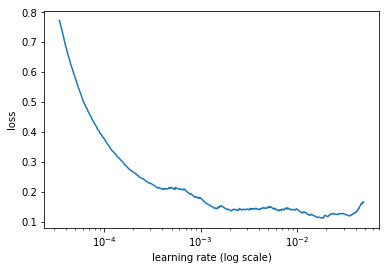

In [55]:
m.sched.plot(100)

In [56]:
lr = 1e-3

### Sample

In [57]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [58]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.026625   0.02907    0.152888  
    1      0.017591   0.031994   0.157452                       
    2      0.016318   0.020767   0.133257                       


[array([0.02077]), 0.13325683288482984]

In [59]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.011314   0.015815   0.118403  
    1      0.010927   0.01652    0.119389                       
    2      0.01004    0.015818   0.117001                        
    3      0.010194   0.015828   0.117047                        
    4      0.008914   0.015907   0.117389                        


[array([0.01591]), 0.11738861056815532]

In [60]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.011616   0.032198   0.157876  
    1      0.009535   0.014615   0.115067                        
    2      0.007664   0.015245   0.115264                        
    3      0.00712    0.014299   0.112985                        
    4      0.010008   0.017197   0.121235                        
    5      0.008423   0.014412   0.114036                        
    6      0.007145   0.015762   0.117231                        
    7      0.006427   0.013727   0.111597                        


[array([0.01373]), 0.11159691547143316]

### All

Reload complete data (had to go back to "create features" heading)

In [73]:
samp_size = n; joined_samp = joined.set_index("Date")
df, y, nas, mapper = proc_df(joined_samp, dep, do_scale=True)
yl = np.log(y)
val_idx = np.flatnonzero(
    (df.index<=datetime.datetime(2014,9,17)) & (df.index>=datetime.datetime(2014,8,1)))
len(val_idx)

38399

In [74]:
max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [75]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test)

In [76]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [77]:
m.fit(lr, 1, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.013408   0.014947   0.123794  


[array([0.01495]), 0.1237941490685109]

In [78]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.012049   0.017449   0.119675  
    1      0.009628   0.013313   0.108205                        
    2      0.009262   0.013673   0.109979                        


[array([0.01367]), 0.10997858168157497]

In [79]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.007884   0.012787   0.104991  
    1      0.006431   0.012387   0.104271                        
    2      0.006548   0.012415   0.103219                        


[array([0.01241]), 0.10321859766591031]

In [80]:
m.save('val0')

In [81]:
x,y=m.predict_with_targs()

In [82]:
exp_rmspe(x,y)

0.10710772615328061